In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/train_final.csv')

In [3]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,LAST_PURCHASE_DATE,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,...,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15
0,249670911D8,2,24.10,2019-02-02,27 days,93 days 00:00:00,0,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,245.0,0.0,0.0,231.0
1,249751FC4DD,1,17.98,2018-10-12,140 days,0 days 00:00:00,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,260.0,0.0,0.0,0.0,0.0
2,24978027606,1,15.96,2018-10-19,133 days,0 days 00:00:00,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24979164422,1,13.96,2018-11-30,91 days,0 days 00:00:00,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2497B8B4FDA,2,33.94,2018-11-01,120 days,29 days 00:00:00,1,1,0,0,...,1.0,1.0,0.0,0.0,0.0,260.0,255.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274082,2E6F72C6F1C,3,51.94,2019-02-27,2 days,64 days 12:00:00,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,126.0
1274083,2E6F8194908,1,11.96,2019-02-23,6 days,0 days 00:00:00,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274084,2E6F9C7B9B4,1,19.98,2019-01-28,32 days,0 days 00:00:00,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274085,2E6FB0EBB32,6,107.88,2019-02-11,18 days,26 days 14:24:00,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,260.0,0.0,0.0,0.0,258.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274087 entries, 0 to 1274086
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   MAGIC_KEY                     1274087 non-null  object 
 1   PURCHASE_COUNT                1274087 non-null  int64  
 2   TOTAL_AMOUNT_SPENT            1274087 non-null  float64
 3   LAST_PURCHASE_DATE            1274087 non-null  object 
 4   DAY_SINCE_LAST_PURCHASE       1274087 non-null  object 
 5   AVERAGE_DIFF                  1274087 non-null  object 
 6   10_2018_FIRST_15              1274087 non-null  int64  
 7   11_2018_FIRST_15              1274087 non-null  int64  
 8   12_2018_FIRST_15              1274087 non-null  int64  
 9   1_2019_FIRST_15               1274087 non-null  int64  
 10  2_2019_FIRST_15               1274087 non-null  int64  
 11  MODE_BOX_ID                   1274087 non-null  float64
 12  T_PURCHASE_10_2018_FIRST_15 

In [5]:
df['LAST_PURCHASE_DATE'] = pd.to_datetime(df['LAST_PURCHASE_DATE'])
df['DAY_SINCE_LAST_PURCHASE'] = pd.to_timedelta(df['DAY_SINCE_LAST_PURCHASE'])
df['AVERAGE_DIFF'] = pd.to_timedelta(df['AVERAGE_DIFF'])

In [6]:
df['DAY_SINCE_LAST_PURCHASE'] = df['DAY_SINCE_LAST_PURCHASE'].dt.days.astype(int)
df['AVERAGE_DIFF'] = df['AVERAGE_DIFF'].dt.days.astype(int)

In [7]:
df.drop(columns=['LAST_PURCHASE_DATE'], inplace=True)

In [8]:
df.head()

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,...,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15
0,249670911D8,2,24.10,27,93,0,1,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,245.0,0.0,0.0,231.0
1,249751FC4DD,1,17.98,140,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,260.0,0.0,0.0,0.0,0.0
2,24978027606,1,15.96,133,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24979164422,1,13.96,91,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2497B8B4FDA,2,33.94,120,29,1,1,0,0,0,...,1.0,1.0,0.0,0.0,0.0,260.0,255.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274087 entries, 0 to 1274086
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   MAGIC_KEY                     1274087 non-null  object 
 1   PURCHASE_COUNT                1274087 non-null  int64  
 2   TOTAL_AMOUNT_SPENT            1274087 non-null  float64
 3   DAY_SINCE_LAST_PURCHASE       1274087 non-null  int32  
 4   AVERAGE_DIFF                  1274087 non-null  int32  
 5   10_2018_FIRST_15              1274087 non-null  int64  
 6   11_2018_FIRST_15              1274087 non-null  int64  
 7   12_2018_FIRST_15              1274087 non-null  int64  
 8   1_2019_FIRST_15               1274087 non-null  int64  
 9   2_2019_FIRST_15               1274087 non-null  int64  
 10  MODE_BOX_ID                   1274087 non-null  float64
 11  T_PURCHASE_10_2018_FIRST_15   1274087 non-null  float64
 12  T_PURCHASE_11_2018_FIRST_15 

In [10]:
from sklearn.preprocessing import LabelEncoder #importing the labenconder
le = LabelEncoder() #creating an instance of LabelEncoder

df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])

In [11]:
df_encoded.head()

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MODE_BOX_ID,...,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2,24.10,27,93,0,1,0,0,1,231.0,...,1.0,0.0,0.0,1.0,0.0,245.0,0.0,0.0,231.0,0
1,1,17.98,140,0,1,0,0,0,0,260.0,...,0.0,0.0,0.0,0.0,260.0,0.0,0.0,0.0,0.0,1
2,1,15.96,133,0,0,0,0,0,0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1,13.96,91,0,0,0,0,0,0,246.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2,33.94,120,29,1,1,0,0,0,255.0,...,1.0,0.0,0.0,0.0,260.0,255.0,0.0,0.0,0.0,4


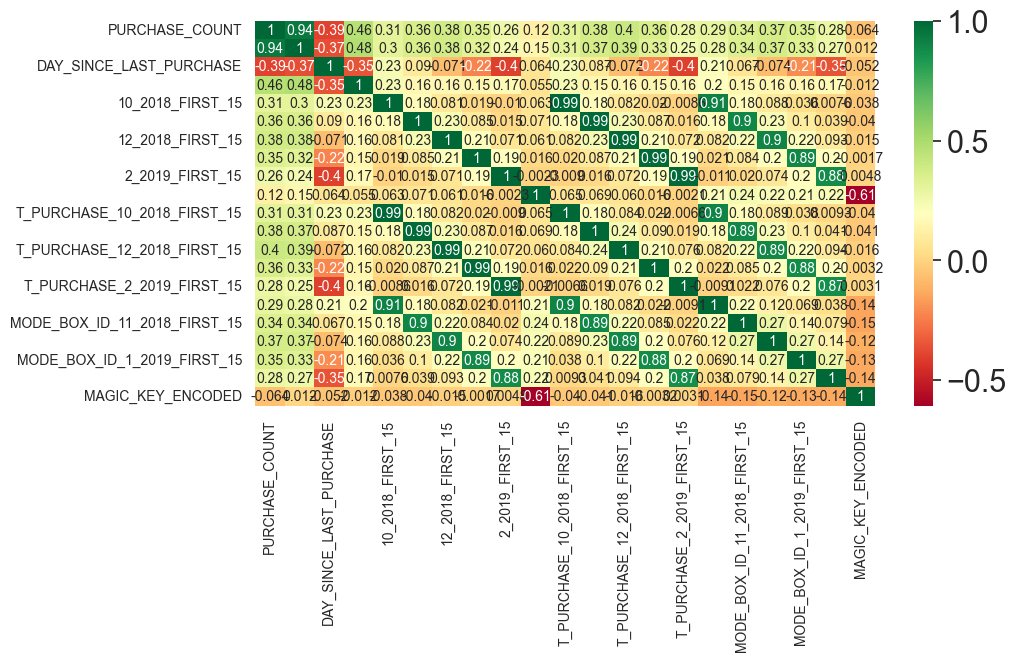

In [12]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [13]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['MODE_BOX_ID_2_2019_FIRST_15'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

MODE_BOX_ID_2_2019_FIRST_15     1.000000
2_2019_FIRST_15                 0.875893
T_PURCHASE_2_2019_FIRST_15      0.868636
PURCHASE_COUNT                  0.279627
MODE_BOX_ID_1_2019_FIRST_15     0.271612
TOTAL_AMOUNT_SPENT              0.266794
MODE_BOX_ID                     0.220939
T_PURCHASE_1_2019_FIRST_15      0.201378
1_2019_FIRST_15                 0.201322
AVERAGE_DIFF                    0.171027
MODE_BOX_ID_12_2018_FIRST_15    0.139549
T_PURCHASE_12_2018_FIRST_15     0.093551
12_2018_FIRST_15                0.092677
MODE_BOX_ID_11_2018_FIRST_15    0.078966
T_PURCHASE_11_2018_FIRST_15     0.040533
11_2018_FIRST_15                0.039486
MODE_BOX_ID_10_2018_FIRST_15    0.037747
T_PURCHASE_10_2018_FIRST_15     0.009302
10_2018_FIRST_15                0.007611
MAGIC_KEY_ENCODED              -0.135653
DAY_SINCE_LAST_PURCHASE        -0.353589


In [14]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MODE_BOX_ID,...,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15,MAGIC_KEY_ENCODED
1170210,1,19.98,145,0,1,0,0,0,0,132.0,...,0.0,0.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0,1170210
819803,1,19.98,123,0,0,0,0,0,0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819803
232752,2,22.92,107,31,1,1,0,0,0,231.0,...,1.0,0.0,0.0,0.0,231.0,238.0,0.0,0.0,0.0,232752
702158,1,23.98,135,0,0,0,0,0,0,163.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702158
196119,2,37.96,94,30,0,0,0,0,0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508899,1,12.18,56,0,0,0,0,1,0,89.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,89.0,0.0,508899
1019909,1,15.96,22,0,0,0,0,0,1,108.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,108.0,1019909
733215,4,95.92,34,35,1,0,0,0,0,163.0,...,0.0,0.0,0.0,0.0,163.0,0.0,0.0,0.0,0.0,733215
79212,2,27.92,106,29,0,1,0,0,0,246.0,...,1.0,0.0,0.0,0.0,0.0,246.0,0.0,0.0,0.0,79212


In [15]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MODE_BOX_ID,...,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,19.98,145,0,1,0,0,0,0,132.0,...,0.0,0.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0,1170210
1,1,19.98,123,0,0,0,0,0,0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819803
2,2,22.92,107,31,1,1,0,0,0,231.0,...,1.0,0.0,0.0,0.0,231.0,238.0,0.0,0.0,0.0,232752
3,1,23.98,135,0,0,0,0,0,0,163.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702158
4,2,37.96,94,30,0,0,0,0,0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274082,1,12.18,56,0,0,0,0,1,0,89.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,89.0,0.0,508899
1274083,1,15.96,22,0,0,0,0,0,1,108.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,108.0,1019909
1274084,4,95.92,34,35,1,0,0,0,0,163.0,...,0.0,0.0,0.0,0.0,163.0,0.0,0.0,0.0,0.0,733215
1274085,2,27.92,106,29,0,1,0,0,0,246.0,...,1.0,0.0,0.0,0.0,0.0,246.0,0.0,0.0,0.0,79212


In [16]:
X = rearranged_df.drop(columns = ['MODE_BOX_ID_2_2019_FIRST_15']) #dropping the class collumn to separate the feature
X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,19.98,145,0,1,0,0,0,0,132.0,1.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0,0.0,1170210
1,1,19.98,123,0,0,0,0,0,0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819803
2,2,22.92,107,31,1,1,0,0,0,231.0,1.0,1.0,0.0,0.0,0.0,231.0,238.0,0.0,0.0,232752
3,1,23.98,135,0,0,0,0,0,0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702158
4,2,37.96,94,30,0,0,0,0,0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274082,1,12.18,56,0,0,0,0,1,0,89.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,89.0,508899
1274083,1,15.96,22,0,0,0,0,0,1,108.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1019909
1274084,4,95.92,34,35,1,0,0,0,0,163.0,1.0,0.0,0.0,0.0,0.0,163.0,0.0,0.0,0.0,733215
1274085,2,27.92,106,29,0,1,0,0,0,246.0,0.0,1.0,0.0,0.0,0.0,0.0,246.0,0.0,0.0,79212


In [17]:
y =  rearranged_df['MODE_BOX_ID_2_2019_FIRST_15'] #separating target to y
y

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1274082      0.0
1274083    108.0
1274084      0.0
1274085      0.0
1274086      0.0
Name: MODE_BOX_ID_2_2019_FIRST_15, Length: 1274087, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split #importing module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [19]:
print(len(X_train)) #checking
print(len(X_test))

1019269
254818


In [20]:
print(len(y_train)) #checking
print(len(y_test))

1019269
254818


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
maxdepth = range(1, 31)
scores = []
for d in maxdepth:
    dt = DecisionTreeClassifier(max_depth = d, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

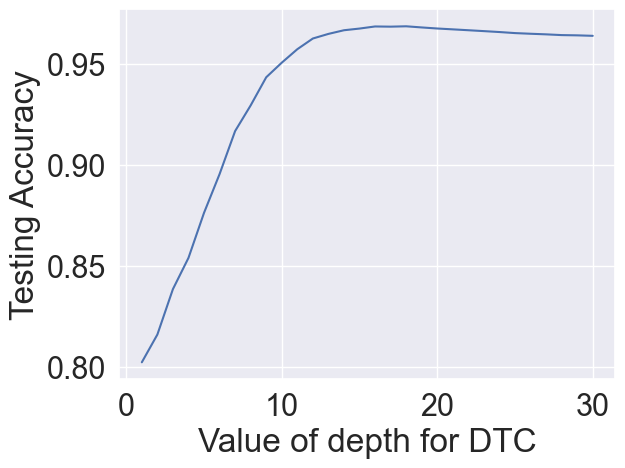

In [23]:
import matplotlib.pyplot as plt #importing marplotlib
#for showing inline
%matplotlib inline 


plt.plot(maxdepth, scores) #defining axis

plt.xlabel("Value of depth for DTC") #labeling the x-axis
plt.ylabel("Testing Accuracy") #labeling the y-axis

In [24]:
max(scores)

0.9688012620772473

In [25]:
scores.index(0.9688012620772473)

17

In [26]:
tree_clf = DecisionTreeClassifier(max_depth = 18, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([3.85632109e-03, 3.61248564e-02, 1.95495623e-02, 1.59203589e-02,
       1.97550852e-04, 2.40369354e-04, 2.20205887e-04, 4.11450459e-04,
       4.93685464e-01, 4.00972573e-01, 2.08384898e-04, 2.69121700e-04,
       5.04607073e-04, 5.19271381e-04, 7.90981118e-04, 2.06485919e-03,
       1.53251107e-03, 2.32112878e-03, 1.36471241e-02, 6.96329830e-03])

In [27]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 18, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, random_state=42)

In [28]:
y_pred = tree_clf.predict(X_test)

In [29]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9688012620772473

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 42, n_jobs = -1, max_leaf_nodes = 2**20, max_features = 20)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=20,
                       max_leaf_nodes=1048576, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.9707948418086635

In [33]:
df_problem = pd.read_csv('Datasets/problem 2.csv')
df_problem

,MAGIC_KEY
0,2C0B5F97180
1,2C2F659EF00
2,29D629EDF20
3,2A7073E2FF0
4,2A9B9BE1210
...,...
43513,2C49A3D7EAD
43514,2C49C75F0D8
43515,2C49CA2A632
43516,2C49D52753F


In [34]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,...,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,249670911D8,2,24.10,27,93,0,1,0,0,1,...,1.0,0.0,0.0,1.0,0.0,245.0,0.0,0.0,231.0,0
1,249751FC4DD,1,17.98,140,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,260.0,0.0,0.0,0.0,0.0,1
2,24978027606,1,15.96,133,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,24979164422,1,13.96,91,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2497B8B4FDA,2,33.94,120,29,1,1,0,0,0,...,1.0,0.0,0.0,0.0,260.0,255.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274082,2E6F72C6F1C,3,51.94,2,64,0,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,126.0,1274082
1274083,2E6F8194908,1,11.96,6,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1274083
1274084,2E6F9C7B9B4,1,19.98,32,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1274084
1274085,2E6FB0EBB32,6,107.88,18,26,1,0,0,0,1,...,0.0,0.0,0.0,1.0,260.0,0.0,0.0,0.0,258.0,1274085


In [35]:
df_test = pd.merge(df_problem, df, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,...,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MODE_BOX_ID_2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2C0B5F97180,5,92.10,26,29,1,1,0,1,1,...,2.0,0.0,1.0,1.0,137.0,89.0,0.0,137.0,141.0,594331
1,2C2F659EF00,5,99.90,22,29,1,1,1,1,1,...,1.0,1.0,1.0,1.0,143.0,143.0,143.0,144.0,144.0,697598
2,29D629EDF20,7,85.62,10,19,0,1,1,1,1,...,1.0,1.0,1.0,1.0,0.0,204.0,238.0,238.0,230.0,309141
3,2A7073E2FF0,5,55.98,20,31,1,1,1,1,1,...,1.0,1.0,1.0,1.0,231.0,231.0,238.0,238.0,230.0,338384
4,2A9B9BE1210,5,92.70,8,35,1,0,1,0,0,...,0.0,1.0,0.0,0.0,238.0,0.0,271.0,0.0,0.0,339823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43513,2C49A3D7EAD,4,79.92,28,30,0,1,1,1,1,...,1.0,1.0,1.0,1.0,0.0,134.0,134.0,133.0,134.0,764666
43514,2C49C75F0D8,2,31.92,25,30,0,0,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,182.0,182.0,764760
43515,2C49CA2A632,3,47.88,29,23,0,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,108.0,0.0,0.0,764777
43516,2C49D52753F,6,119.88,16,25,1,1,1,1,1,...,1.0,2.0,1.0,1.0,40.0,40.0,41.0,44.0,42.0,764867


In [36]:
df_test = df_test.drop(columns = ['MODE_BOX_ID_2_2019_FIRST_15'])
df_test

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,...,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2C0B5F97180,5,92.10,26,29,1,1,0,1,1,...,1.0,2.0,0.0,1.0,1.0,137.0,89.0,0.0,137.0,594331
1,2C2F659EF00,5,99.90,22,29,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,143.0,143.0,143.0,144.0,697598
2,29D629EDF20,7,85.62,10,19,0,1,1,1,1,...,0.0,1.0,1.0,1.0,1.0,0.0,204.0,238.0,238.0,309141
3,2A7073E2FF0,5,55.98,20,31,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,231.0,231.0,238.0,238.0,338384
4,2A9B9BE1210,5,92.70,8,35,1,0,1,0,0,...,1.0,0.0,1.0,0.0,0.0,238.0,0.0,271.0,0.0,339823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43513,2C49A3D7EAD,4,79.92,28,30,0,1,1,1,1,...,0.0,1.0,1.0,1.0,1.0,0.0,134.0,134.0,133.0,764666
43514,2C49C75F0D8,2,31.92,25,30,0,0,0,1,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,182.0,764760
43515,2C49CA2A632,3,47.88,29,23,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,108.0,0.0,764777
43516,2C49D52753F,6,119.88,16,25,1,1,1,1,1,...,1.0,1.0,2.0,1.0,1.0,40.0,40.0,41.0,44.0,764867


In [37]:
df_test_X = df_test.drop(columns = ['MAGIC_KEY'])
df_test_X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,5,92.10,26,29,1,1,0,1,1,137.0,1.0,2.0,0.0,1.0,1.0,137.0,89.0,0.0,137.0,594331
1,5,99.90,22,29,1,1,1,1,1,143.0,1.0,1.0,1.0,1.0,1.0,143.0,143.0,143.0,144.0,697598
2,7,85.62,10,19,0,1,1,1,1,238.0,0.0,1.0,1.0,1.0,1.0,0.0,204.0,238.0,238.0,309141
3,5,55.98,20,31,1,1,1,1,1,231.0,1.0,1.0,1.0,1.0,1.0,231.0,231.0,238.0,238.0,338384
4,5,92.70,8,35,1,0,1,0,0,270.0,1.0,0.0,1.0,0.0,0.0,238.0,0.0,271.0,0.0,339823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43513,4,79.92,28,30,0,1,1,1,1,134.0,0.0,1.0,1.0,1.0,1.0,0.0,134.0,134.0,133.0,764666
43514,2,31.92,25,30,0,0,0,1,1,182.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,182.0,764760
43515,3,47.88,29,23,0,0,1,0,0,108.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,108.0,0.0,764777
43516,6,119.88,16,25,1,1,1,1,1,40.0,1.0,1.0,2.0,1.0,1.0,40.0,40.0,41.0,44.0,764867


In [39]:
y_pred = classifier.predict(df_test_X)
y_pred

array([141., 144., 238., ...,   0.,  42., 134.])

In [40]:
# Add the predicted values as a new column to X_test
df_test['BOX_ID'] = y_pred

# Now X_test contains the predicted values in the 'y_pred' column
df_test

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,...,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,T_PURCHASE_2_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED,BOX_ID
0,2C0B5F97180,5,92.10,26,29,1,1,0,1,1,...,2.0,0.0,1.0,1.0,137.0,89.0,0.0,137.0,594331,141.0
1,2C2F659EF00,5,99.90,22,29,1,1,1,1,1,...,1.0,1.0,1.0,1.0,143.0,143.0,143.0,144.0,697598,144.0
2,29D629EDF20,7,85.62,10,19,0,1,1,1,1,...,1.0,1.0,1.0,1.0,0.0,204.0,238.0,238.0,309141,238.0
3,2A7073E2FF0,5,55.98,20,31,1,1,1,1,1,...,1.0,1.0,1.0,1.0,231.0,231.0,238.0,238.0,338384,230.0
4,2A9B9BE1210,5,92.70,8,35,1,0,1,0,0,...,0.0,1.0,0.0,0.0,238.0,0.0,271.0,0.0,339823,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43513,2C49A3D7EAD,4,79.92,28,30,0,1,1,1,1,...,1.0,1.0,1.0,1.0,0.0,134.0,134.0,133.0,764666,134.0
43514,2C49C75F0D8,2,31.92,25,30,0,0,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,182.0,764760,182.0
43515,2C49CA2A632,3,47.88,29,23,0,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,108.0,0.0,764777,0.0
43516,2C49D52753F,6,119.88,16,25,1,1,1,1,1,...,1.0,2.0,1.0,1.0,40.0,40.0,41.0,44.0,764867,42.0


In [41]:
df_test['BOX_ID'].value_counts()

BOX_ID
0.0      12331
144.0     5482
162.0     3436
119.0     2197
141.0     2181
         ...  
196.0        1
223.0        1
68.0         1
158.0        1
43.0         1
Name: count, Length: 108, dtype: int64

In [42]:
solutions = df_test[['MAGIC_KEY', 'BOX_ID']].copy()
solutions

,MAGIC_KEY,BOX_ID
0,2C0B5F97180,141.0
1,2C2F659EF00,144.0
2,29D629EDF20,238.0
3,2A7073E2FF0,230.0
4,2A9B9BE1210,0.0
...,...,...
43513,2C49A3D7EAD,134.0
43514,2C49C75F0D8,182.0
43515,2C49CA2A632,0.0
43516,2C49D52753F,42.0


In [43]:
solutions.to_csv("Submission.csv", index=False)  # Save test data